In [1]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [2]:
import random

def game(ra, rb):
    p = ra/(ra+rb)
    player_a_points = 0
    player_b_points = 0
    while True:
        if((player_a_points >= 11 and player_a_points-player_b_points >= 2) or (player_b_points>=11 and player_b_points-player_a_points >= 2)):
            return(player_a_points, player_b_points)
        else:
            r = random.uniform(0,1)
            if r<p:
                player_a_points +=1
            else:
                player_b_points +=1

game(70,30)



(11, 1)

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [3]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [4]:
def win_probability_game(ra, rb, simulations=100):
    a_total=0
    for i in range(simulations):
        this_game = game(ra,rb)
        if this_game[0] > this_game[1]:
            a_total+=1
    p = a_total/simulations
    return p



**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [5]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [6]:
import csv

def read_abilities(filename): # HINT: what should the argument be?
    abilities=[]
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            tup=(int(row[0]), int(row[1]))
            abilities.append(tup)
    return abilities        





**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [7]:
read_abilities("test.csv")

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [8]:
import matplotlib.pyplot as plt

def plot_win_probabilities(list): # HINT: what should the argument be?
    probabilities =[]
    ratio = []
    for item in list:
        probabilities.append(win_probability_game(item[0], item[1]))
        calc = item[0]/item[1]
        ratio.append(round(calc, 2))
    plt.plot(ratio, probabilities, 'rx')
    plt.ylabel("probability a wins")
    plt.xlabel("ratio ra/rb")
    plt.show()


    




**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


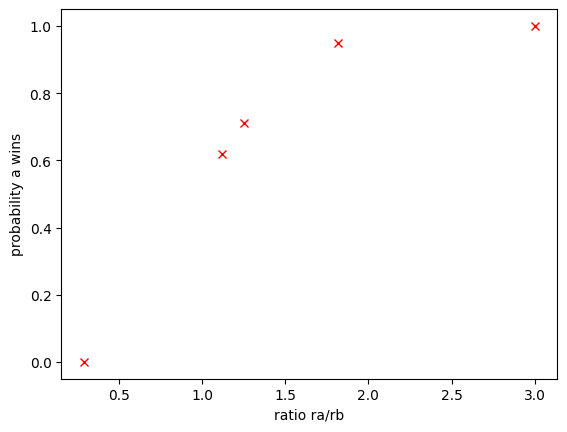

In [9]:
l =[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]
plot_win_probabilities(l)

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [10]:
def win_probability_match(ra, rb, simulations=100, m=3):
    a_simulation_wins=0
    b_simulation_wins=0
    for i in range(simulations):
        a_game_wins=0
        b_game_wins=0
        while (a_game_wins<m) and (b_game_wins<m):
            score = game(ra,rb)
            if score[0]>score[1]:
                a_game_wins+=1
                if a_game_wins==m:
                    a_simulation_wins +=1
            else:
                b_game_wins+=1
                if b_game_wins == m:
                    b_simulation_wins +=1

    probability = a_simulation_wins/simulations
    return probability
    


m=0
out=0
while out < 0.9:
    out = win_probability_match(60,40,100,m)
    m+=1
print(m)


3


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

In this experiment, I will be investigating weather the Point a Rally system or the English system is superior for scoring games of squash. I will be assessing both of these scoring systems based on the length of time it takes for a game to play given the amount of rallies played. As squash is a televised sport; short and action packed games are more desireable as they can fit into TV schedules more fluidly and are more entertaining. Therefore I judge the supiror system to produce consistently short matches.

## Method

In order to keep my investigation controlled, I will ensure that I use the same rating distribution for both players in both scoring systems.I will also ensure that in both scoring systems a player must win the same amount of games in order to win a match. I will be measuring the duration of each game by the amount of points played per game, with each point taking 20 seconds. That way, I can convert to minutes for a clear demonstrstion of game time. I will be changing the rating of the second player so that I can analyse how the game time changes as games become progressively more difficult.

I have coded the two scoring methods and a games() method which takes player a's rating, a list of (n) player b's ratings and the desired amount of games for a player to win a match. This way, there are (n) amount of repeats in the investagation. I will use 100 values of player b's rating whilst keeping player a's rating at 60 to evaluate how the amount of rallies changes based on both the scoring methods, and player b's rating.


In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np

def english(ra,rb):
    p = ra/(ra+rb)
    server=0
    points=[0,0]
    cap=9
    count=0
    while points[0]<cap and points[1]<cap:
        count +=1
        if points[0] and points[1] == 8:
            if server==0 and ra>rb:
                cap=cap+1
            elif server==0 and ra<rb:
                cap=cap+2
            elif server==1 and ra>rb:
                cap=cap+2
            else:
                cap=cap+1
        r = random.uniform(0,1)
        if r < p and server==0:
            points[0]+=1
        elif r < p and server==1:
            server=0
        elif r>p and server ==0:
            server=1
        else:
            points[1] +=1
    return [count,points[0], points[1]]

def pars(ra,rb):
    p=ra/(ra+rb)
    points=[0,0]
    count=0
    while not((points[0]>11 and (points[0]-points[1])>2) or (points[1]>11 and (points[1]-points[0])>2)):
        count+=1
        r=random.uniform(0,1)
        if r<p:
            points[0]+=1
        else:
            points[1]+=1
    return [count,points[0], points[1]]


In [12]:
def games(type,m,ra,rb):
    times=[]
    for i in rb:
        matchwins=[0,0]
        count=0
        while matchwins[0]<m and matchwins[1]<m:
            if type==0:
                score = pars(ra,rb[i])
                count+=score[0]
                if score[1]>score[2]:
                    matchwins[0]+=1
                else:
                    matchwins[1]+=1
            else:
                score=english(ra,rb[i])
                count+=score[0]
                if score[1]>score[2]:
                    matchwins[0]+=1
                else:
                    matchwins[1]+=1
        times.append(count)
    return times

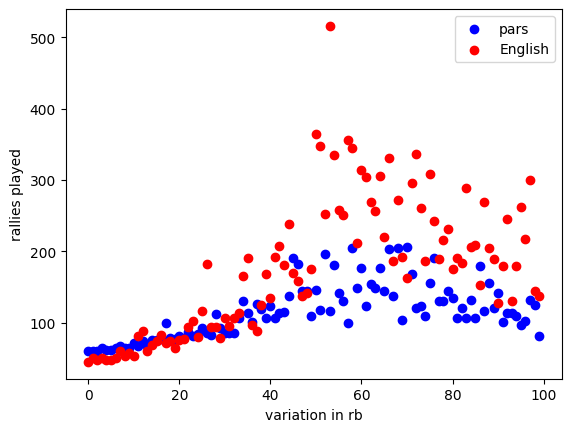

In [13]:
def plotgames():
    rb =range(0,100,1)
    pars=games(0,5,60,rb)
    english= games(1,5,60,rb)
    plt.scatter(rb, pars, color='blue', label='pars')
    plt.scatter(rb,english,color='red',label='English')
    plt.ylabel('rallies played')
    plt.xlabel('variation in rb')
    plt.legend()
    plt.show()



plotgames()



## Assumptions

In order to carry out my investagation, I have made a number of assumptions to model the players and the outcome of the games. Firstly, I have assumed that each player plays every set and rally exactly to their ability rating with no deviation. This is unrealistic as it assumes that players play at the same level completely consistently and does not account for pressure, crowds, biases in umpires or weather. Secondly I have assumed in the English scoring method that if the score is tied at 8-8, the server will choose 1 extra point if their rating is higher than their opponents and 2 if it less. Whilst this ties into logic (as the lower rated player would have a greater chance of winning a tie with more rallies played) it is not given that it will occur everytime. I have also assumed that each rally between the two players takes the same amount of time despite the players individual rating which is very unlikely.

## Results

example 1:
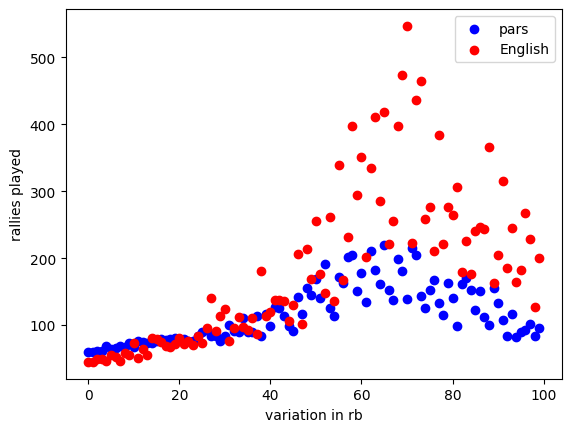
example 2:
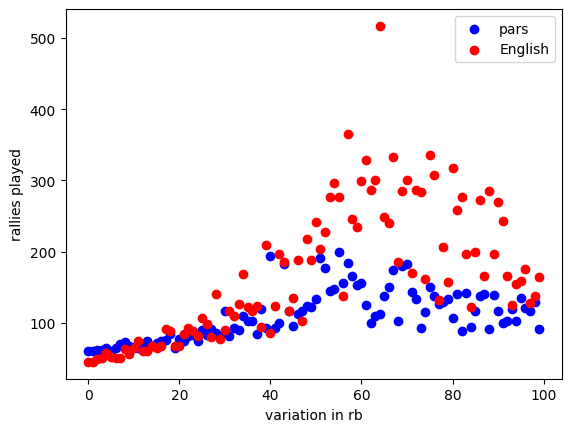

This graph is a plot of the rallies played throughout a match to the variation of player b's rating from 0 to 100. The results show that regardless of player b's rating, the PARS scoring system results in consistently shorter matches than the English scoring system. As the ratio of player a's rating to player b's rating gets increasingly smaller, the English scoring method suffers from inconsistency in the amount of rallies played per match.

## Conclusions

In conclusion, I can determine that the Point a Rally System is the superior scoring method for squash. This is due to two major factors, firstly from the graph we can determine that the PARS scoring method is more consistent in its timings. That is to say that even when the ratings of the two players are even, the match consists of similar amounts of rallies as when the ratings are drastically differernt resulting in matches taking the same amount of time to play regardless of ability. This differs from the English scoring method, which experiences wildy inconsistent amounts of rallies when the ratings of the two players become similar. This is likely due to more 8-8 point ties and the fact that a player can only win a point if they were the server. 
Secondly, whilst my data clearly shows that for games against very low rated players the English scoring method results in shorter games, it is only for a small subset of player b ratings that are unlikely to be playing against a player rated at 60. In comparrison, the PARS scoring method stays low in amount of rallies throughout the whole variation of player b's rating.

Therefore, the choice is obvious that the better scoring method for squash is Point a Rally- it is more consistently short which makes it ideal for televised sport.